## Importing Required Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split

from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import GridSearchCV

In [ ]:
data=pd.read_csv('/content/Titanic_train.csv')

# EDA

In [ ]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Visualizations

<Axes: xlabel='Survived'>

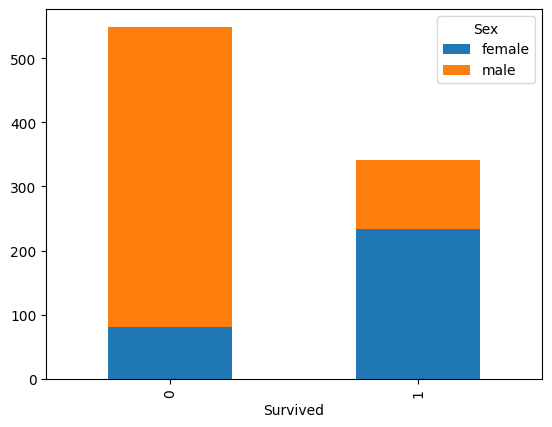

In [ ]:
pd.crosstab(data["Survived"],data["Sex"]).plot(kind="bar",stacked=True)

<Axes: xlabel='Survived'>

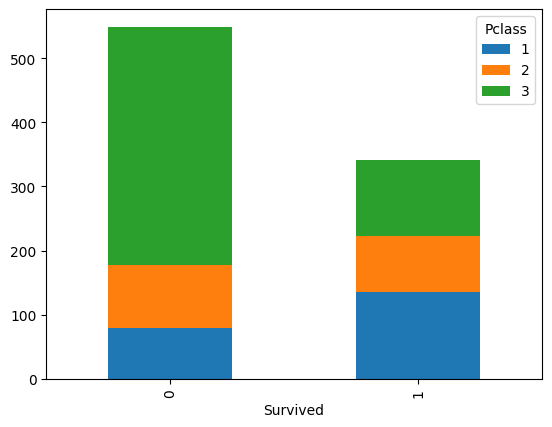

In [ ]:
pd.crosstab(data["Survived"],data["Pclass"]).plot(kind="bar",stacked=True)

<Axes: xlabel='Survived'>

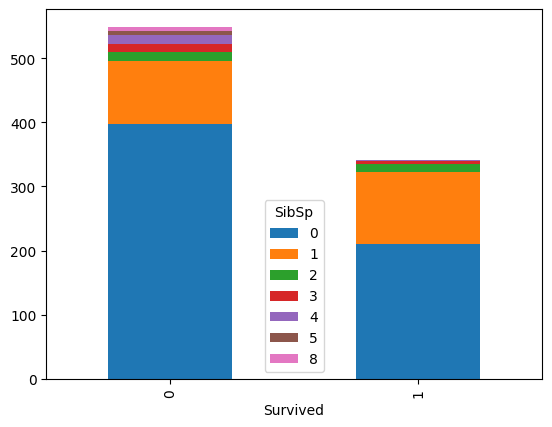

In [ ]:
pd.crosstab(data["Survived"],data["SibSp"]).plot(kind="bar",stacked=True)

<Axes: xlabel='Survived'>

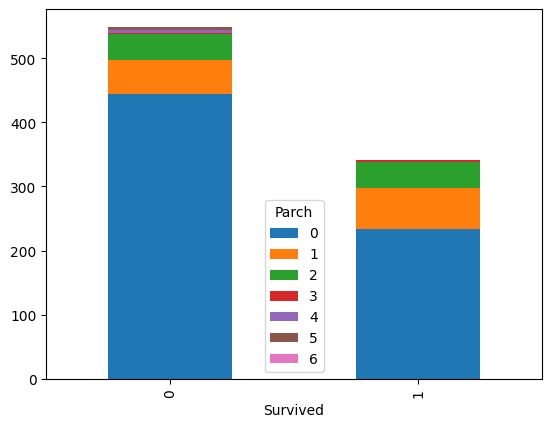

In [ ]:
pd.crosstab(data["Survived"],data["Parch"]).plot(kind="bar",stacked=True)

<Axes: xlabel='Survived'>

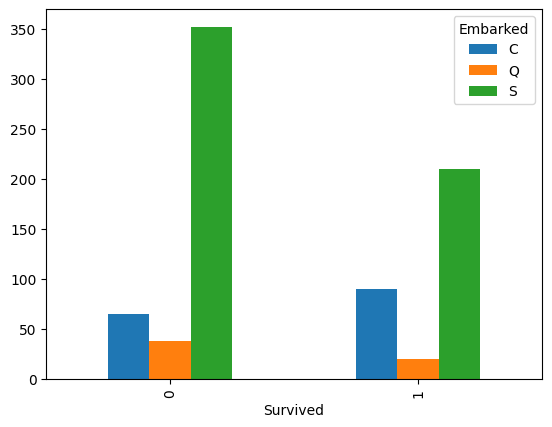

In [ ]:
pd.crosstab(data["Survived"],data["Embarked"]).plot(kind="bar")

<Axes: ylabel='count'>

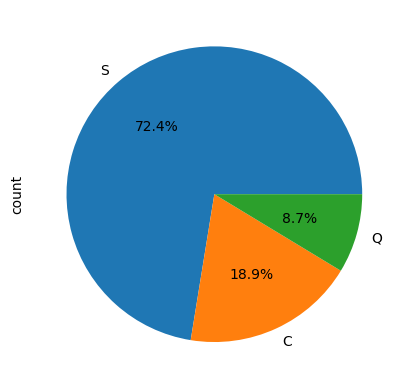

In [ ]:
data["Embarked"].value_counts().plot(kind="pie",autopct="%1.1f%%")

<Axes: ylabel='count'>

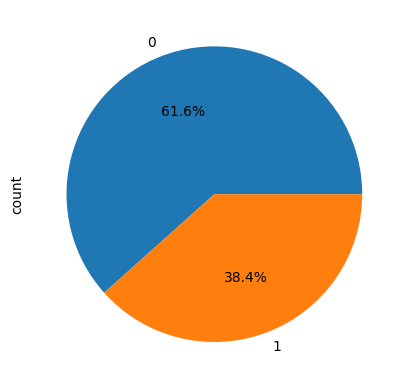

In [ ]:
data["Survived"].value_counts().plot(kind="pie",autopct="%1.1f%%")

<Axes: ylabel='count'>

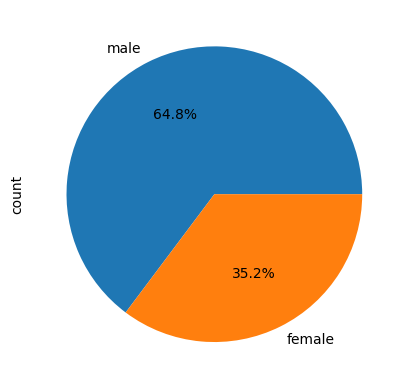

In [ ]:
data["Sex"].value_counts().plot(kind="pie",autopct="%1.1f%%")

<Axes: xlabel='Age', ylabel='Count'>

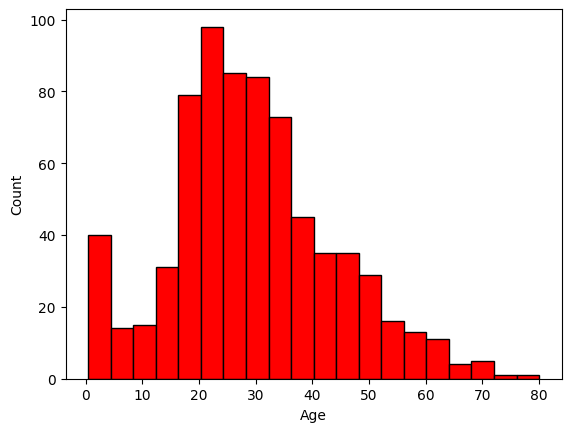

In [ ]:
sns.histplot(data["Age"],facecolor="red")

In [ ]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## Striplots

<Axes: xlabel='Survived', ylabel='Age'>

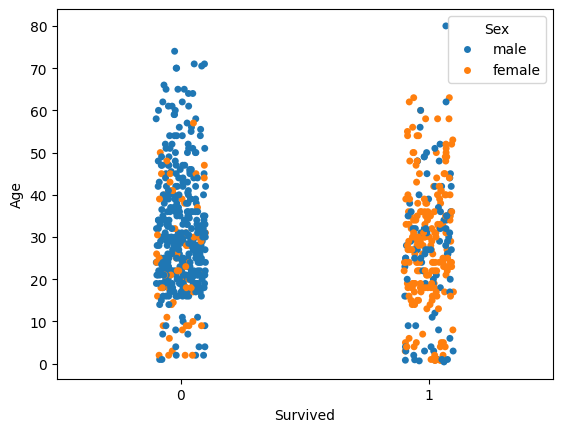

In [ ]:
sns.stripplot(x="Survived",y="Age",hue="Sex",data=data)

<Axes: xlabel='Survived', ylabel='Age'>

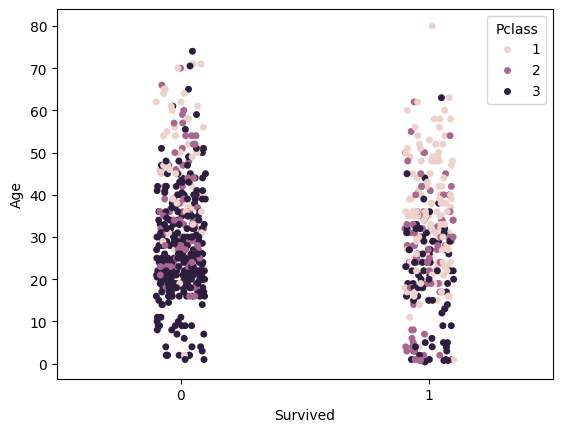

In [ ]:
sns.stripplot(x="Survived",y="Age",hue="Pclass",data=data)

<Axes: xlabel='Survived', ylabel='PassengerId'>

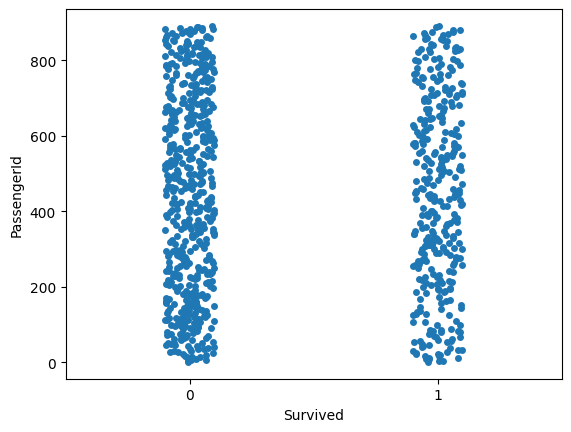

In [ ]:
sns.stripplot(x="Survived",y="PassengerId",data=data)

<Axes: xlabel='Survived', ylabel='Fare'>

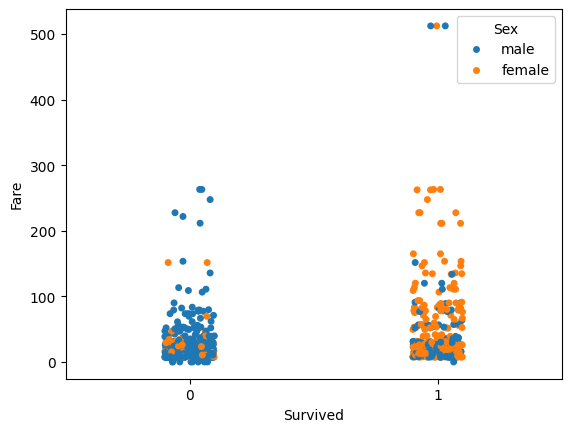

In [ ]:
sns.stripplot(x="Survived",y="Fare",hue="Sex",data=data)

In [ ]:
data["Cabin"].value_counts()

,count
Cabin,
B96 B98,4
G6,4
C23 C25 C27,4
C22 C26,3
F33,3
...,...
E34,1
C7,1
C54,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
data.drop(["PassengerId","Name","Ticket","Cabin"],axis=1,inplace=True)  #Unnecessary columns are removing

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


### Checking for Null Values

In [ ]:
data.isnull().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,177
SibSp,0
Parch,0
Fare,0
Embarked,2


<Axes: xlabel='Age', ylabel='Count'>

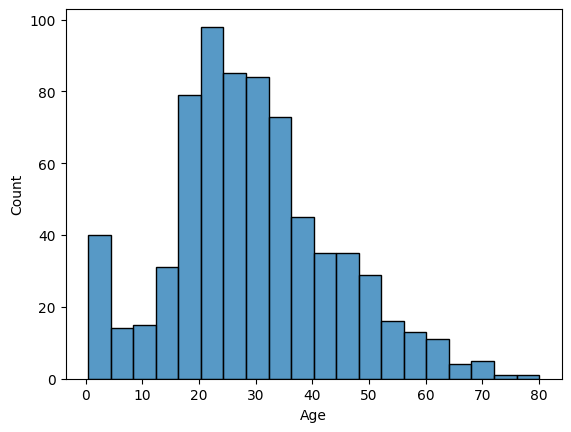

In [ ]:
sns.histplot(data["Age"])

### Imputing Null values

In [ ]:
data["Age"]

,Age
0,22.0
1,38.0
2,26.0
3,35.0
4,35.0
...,...
886,27.0
887,19.0
888,NaN
889,26.0


In [ ]:
data["Age"].mean()

29.69911764705882

In [ ]:
data["Age"].median()

28.0

In [ ]:
data["Age"].fillna(data["Age"].median(),inplace=True)

In [ ]:
data.isnull().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0
Embarked,2


In [ ]:
data["Embarked"].mode()[0]

'S'

In [ ]:
data["Embarked"].fillna(data["Embarked"].mode()[0],inplace=True)

In [ ]:
data.isnull().sum().sum()

0

### Checking for Duplicates

In [ ]:
data[data.duplicated(keep=False)]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked


In [ ]:
data.drop_duplicates(keep="first",inplace=True)

In [ ]:
data.reset_index(drop=True,inplace=True)

In [ ]:
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
770,0,3,female,39.0,0,5,29.1250,Q
771,1,1,female,19.0,0,0,30.0000,S
772,0,3,female,28.0,1,2,23.4500,S
773,1,1,male,26.0,0,0,30.0000,C


In [ ]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,775.000000,775.000000,775.000000,775.000000,775.000000,775.000000
mean,0.412903,2.246452,29.581187,0.529032,0.420645,34.878403
std,0.492674,0.853574,13.766359,0.990326,0.840565,52.408474
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,21.000000,0.000000,0.000000,8.050000
50%,0.000000,3.000000,28.000000,0.000000,0.000000,15.900000
75%,1.000000,3.000000,36.000000,1.000000,1.000000,34.197900
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Detecting and Treating Anamolies

{'whiskers': [<matplotlib.lines.Line2D at 0x79f1e6a4add0>,
 'caps': [<matplotlib.lines.Line2D at 0x79f1e6a4b310>,
 'boxes': [<matplotlib.lines.Line2D at 0x79f1e6a4ab30>],
 'medians': [<matplotlib.lines.Line2D at 0x79f1e6a4b850>],
 'fliers': [<matplotlib.lines.Line2D at 0x79f1e6a4baf0>],
 'means': []}

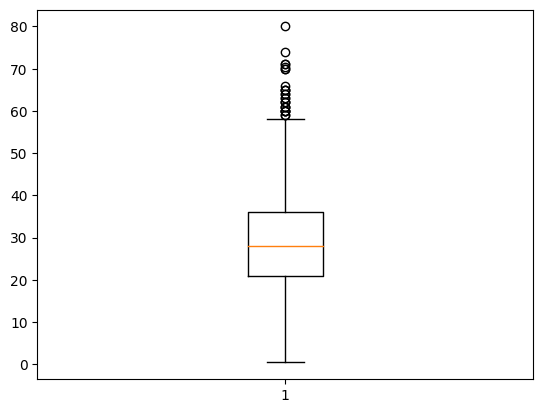

In [ ]:
plt.boxplot(data["Age"])

In [ ]:
np.percentile(data.Age,[99])

array([65.26])

In [ ]:
a=np.percentile(data.Age,[99])[0]
a

65.25999999999999

In [ ]:
data.Age[(data.Age>2*a)]=2*a

{'whiskers': [<matplotlib.lines.Line2D at 0x79f1e6ae4580>,
 'caps': [<matplotlib.lines.Line2D at 0x79f1e6ae4100>,
 'boxes': [<matplotlib.lines.Line2D at 0x79f1e6ae4970>],
 'medians': [<matplotlib.lines.Line2D at 0x79f1e6ae5bd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x79f1e6ae76a0>],
 'means': []}

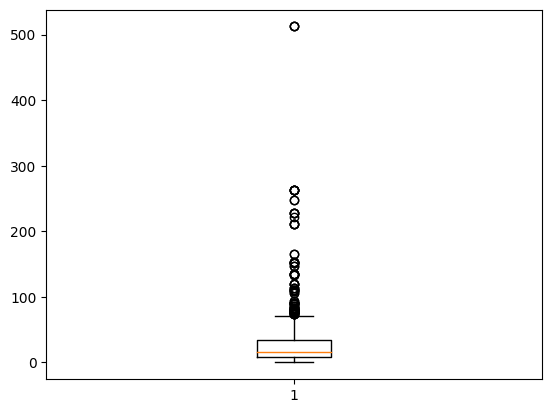

In [ ]:
plt.boxplot(data["Fare"])

In [ ]:
a=np.percentile(data.Fare,[99])[0]
a

262.375

In [ ]:
data.Fare[(data.Fare>2*a)]=2*a

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 775 entries, 0 to 774
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  775 non-null    int64  
 1   Pclass    775 non-null    int64  
 2   Sex       775 non-null    object 
 3   Age       775 non-null    float64
 4   SibSp     775 non-null    int64  
 5   Parch     775 non-null    int64  
 6   Fare      775 non-null    float64
 7   Embarked  775 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 48.6+ KB


## Label Encoding

In [ ]:
data["Sex"]=LabelEncoder().fit_transform(data["Sex"])

In [ ]:
data["Embarked"]=LabelEncoder().fit_transform(data["Embarked"])

## Standardization

In [ ]:
scale=StandardScaler()
data["Age"]=scale.fit_transform(data[["Age"]])
data["Fare"]=scale.fit_transform(data[["Fare"]])

In [ ]:
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,-0.551060,1,0,-0.527515,2
1,1,1,0,0.611945,1,0,0.695086,0
2,1,3,0,-0.260308,0,0,-0.514627,2
3,1,1,0,0.393881,1,0,0.347909,2
4,0,3,1,0.393881,0,0,-0.512240,2
...,...,...,...,...,...,...,...,...
770,0,3,0,0.684632,0,5,-0.109851,1
771,1,1,0,-0.769123,0,0,-0.093144,2
772,0,3,0,-0.114933,1,2,-0.218205,2
773,1,1,1,-0.260308,0,0,-0.093144,0


### Separation columns into Target and Independent Variables

In [ ]:
y=data.iloc[:,0]
x=data.iloc[:,1:]

In [ ]:
y

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
770,0
771,1
772,0
773,1


## Train-Test Splitting

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=36)

In [ ]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((542, 7), (233, 7), (542,), (233,))

## Applying XGBoosting Algorithm

In [ ]:
model=XGBClassifier()
model.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
y_pred=model.predict(x_test)

### Evaluation Metrics

In [ ]:
accuracy_score(y_test,y_pred)

0.8025751072961373

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.78      0.88      0.83       124
           1       0.84      0.72      0.77       109

    accuracy                           0.80       233
   macro avg       0.81      0.80      0.80       233
weighted avg       0.81      0.80      0.80       233



## Hyperparameter Tuning for XGBoosting Model

In [ ]:
param_grid={
    "learning_rate":[0.05,0.10,0.15,0.20,0.25,0.30],
    "n_estimators":[100,200,300,400,500],
    "max_depth":[3,4,5,6,8,10,12],
    "gamma":[0,2,4,6,8],
    "subsample":[0.5,0.75,1],
    "colsample_bytree":[0.5,0.75,1],
    "reg_lambda":[0,0.1,0.5,1],
    "reg_alpha":[0,0.1,0.5,1]
}

grid=GridSearchCV(XGBClassifier(),param_grid)
grid.fit(x_train,y_train)

## Applying LGBoosting Model

In [ ]:
model=LGBMClassifier()
model.fit(x_train,y_train)

[LightGBM] [Info] Number of positive: 211, number of negative: 331
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000859 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 185
[LightGBM] [Info] Number of data points in the train set: 542, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.389299 -> initscore=-0.450260
[LightGBM] [Info] Start training from score -0.450260
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


LGBMClassifier()

In [ ]:
y_pred=model.predict(x_test)

### Evaluation Metrics

In [ ]:
accuracy_score(y_test,y_pred)

0.8283261802575107

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.93      0.85       124
           1       0.90      0.72      0.80       109

    accuracy                           0.83       233
   macro avg       0.84      0.82      0.82       233
weighted avg       0.84      0.83      0.83       233



### Hyperparameter Tuning for LGBoosting Model

In [ ]:
param_grid={
    "num_leaves":[10,20,30,40,50,60,70,80,90,100,120],
    "learning_rate":[0.05,0.10,0.15,0.20,0.25,0.30],
    "n_estimators":[100,200,300,400,500],
    "max_depth":[3,4,5,6,8,10,12],
    "gamma":[0,2,4,6,8],
    "subsample":[0.5,0.75,1],
    "colsample_bytree":[0.5,0.75,1],
    "reg_lambda":[0,0.1,0.5,1],
    "reg_alpha":[0,0.1,0.5,1]
}

grid=GridSearchCV(LGBMClassifier(),param_grid)
grid.fit(x_train,y_train)

## Comparative Analysis

We got best accuracy with LGboosting 83% compares to XGboosting.But during the parameters tuning both taking hours which means both are computationally expensive.